# Homework 02

Please fill in: Sanskruti Jadhav

The goal of this homework is to understand iterative and recursive algorithms and complexity. We are using Pell Numbers as an example. They are defined as:
$$
    P_n = \begin{cases} 0 & n=0 \\ 1 & n=1 \\ P_{n-2} + 2P_{n-1} & \text{else} \end{cases}
$$

## Question 1

Write a function print_elements(l) that prints every element of the list L. If an element is a list by itself, recursively call print_elements() for this element instead. To find out if a variable x is a list, use type(x). Note that the function should not return anything!

In [1]:
def print_elements(L):
     # TODO: replace this
    for i in range(len(L)):
        if type(L[i])==list:
            print_elements(L[i])
        else : print(L[i])

print_elements([[1,"hello"], 3, [4,5,6],[1,[2,[3]]]])

1
hello
3
4
5
6
1
2
3


## Question 2

Write pell_recursive(n) that returns the n-th Pell number as a recursive function using the definition above.

In [2]:
def pell_recursive(n):
    if n == 0 or n==1:
        return n
    else :
        return pell_recursive(n-2) + 2*pell_recursive(n-1)
     # TODO: replace this

print ([pell_recursive(n) for n in range(0,20)])

[0, 1, 2, 5, 12, 29, 70, 169, 408, 985, 2378, 5741, 13860, 33461, 80782, 195025, 470832, 1136689, 2744210, 6625109]


### Question 3
Write a function pell_recursive_cost(n) that returns the total number of function calls pell_recursive() will do for a given n (it should be 1 for n=0 and n=1, and 3 for n=2). What sequence is that? What is the complexity of pell_recursive(n)? Is it polynomial?

In [3]:
def pell_recursive_cost(n):
    if n==1 or n==0:
        return 1
    else:    
        return 1+ pell_recursive_cost(n-2) + pell_recursive_cost(n-1) # TODO: replace this

print ([pell_recursive_cost(n) for n in range(0,20)])

# this sequence is known as: Leonardo Numbers
# complexity is O(2^n)
# complexity is exponential not polynomial   (is / is not) polynomial

[1, 1, 3, 5, 9, 15, 25, 41, 67, 109, 177, 287, 465, 753, 1219, 1973, 3193, 5167, 8361, 13529]


Text(0.5, 0, 'N')

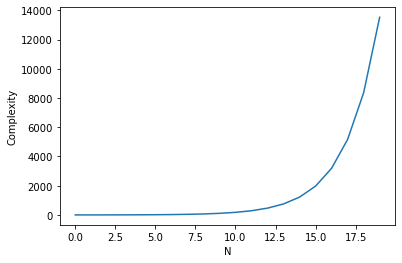

In [23]:
import matplotlib.pyplot as plt
arr=[pell_recursive_cost(n) for n in range(0,20)]
plt.plot(arr)
plt.ylabel("Complexity")
plt.xlabel("N")

## Question 4
Write a function pell_iterative(n) that returns the n-th Pell number using an iterative approach (that does not recompute P_2 more than once when computing P_5 for example). Check your result.

In [5]:
def pell_iterative(n):
    temp_a = 0 # considering base case of pell(0)
    temp_b = 1 # considering base case of pell(1)
    if n==0 or n == 1:    
        return n
    for i in range(2,n+1):
        # We need only previous two pell numbers of n
        result = temp_b * 2 +  temp_a # pell(2) = pell(1)*2 + pell(0) -> result(n=2)= temp_b*2 + temp_a
        temp_a = temp_b # update pell(n-2)
        temp_b = result # update pell(n-1)
    return result   

print ([pell_iterative(n) for n in range(0,20)])

[0, 1, 2, 5, 12, 29, 70, 169, 408, 985, 2378, 5741, 13860, 33461, 80782, 195025, 470832, 1136689, 2744210, 6625109]


## Question 5
Write a function pell_iterative_cost(n) that returns the number of additions and multiplications done to compute pell_iterative(n). What is the complexity of pell_iterative(n)?

In [6]:
def pell_iterative_cost(n):
    calc=0 # initializing 0 calculation in total
    if n==0 or n == 1:    
        return calc
    for i in range(2,n+1):
        calc += 2  # one multiplication and one addition always in one iteration  
    return calc # replace this

print ([pell_iterative_cost(n) for n in range(0,20)])

# complexity is: O(n) as number of operations are constant*n

[0, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]


Text(0.5, 0, 'N')

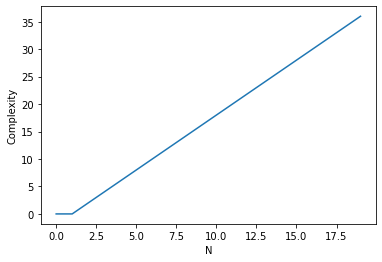

In [24]:
import matplotlib.pyplot as plt
arr=[pell_iterative_cost(n) for n in range(0,20)]
plt.plot(arr)
plt.ylabel("Complexity")
plt.xlabel("N")

## Question 6
Look up Pell number on wikipedia and find the direct formula and implement it as pell_direct(n) (you should round your answer using round()). Find the smallest n where the direct formula is no longer accurate. Explain why.

In [19]:
import math # needed for math.sqrt()

def pell_direct(n):
    
    result =((1 + math.sqrt(2))**n - (1 - math.sqrt(2))**n )/( 2 * math.sqrt(2) )
    result = round(result) 
    return result # TODO: replace this

print ([ pell_direct(n) for n in range (0,20) ])

[0, 1, 2, 5, 12, 29, 70, 169, 408, 985, 2378, 5741, 13860, 33461, 80782, 195025, 470832, 1136689, 2744210, 6625109]


In [22]:
# somehow compare pell_direct(n) and pell_iterative(n) and find smallest n where they differ
for n in range(50):
    if pell_direct(n) != pell_iterative(n):
        print(n, pell_direct(n), pell_iterative(n))
        
############ n                      pell_direct(n), pell_iterative(n)         #########
# at n=39>>rounded results --     299713796309064 299713796309065
# at n=39>>non-rounded results--  299713796309064.4 299713796309065
# at n = 40 >>                    723573111879670.5 --- 723573111879672


# TODO
# there is difference at n=39 of 1 for the 2 functions..
#the difference increases for all the proceeding numbers as well
# why does this happen for this n? 
# The floating point precision in python is 17 digits since it is double precision 64 bit floating point std.
# when I remove rounding off from pell_direct, the exponent part takes 15 digits and one digit of fraction remains
# hence precision is lost and that is why there is difference in the output, since fraction part is just 4 it gets rounded off to lower digit
#this holds good for all the proceeding numbers greater than 39 because the total digits will always be greater than 17

39 299713796309064 299713796309065
40 723573111879670 723573111879672
41 1746860020068405 1746860020068409
42 4217293152016480 4217293152016490
43 10181446324101364 10181446324101389
44 24580185800219208 24580185800219268
45 59341817924539776 59341817924539925
46 143263821649298768 143263821649299118
47 345869461223137280 345869461223138161
48 835002744095573376 835002744095575440
49 2015874949414283776 2015874949414289041


## Question 7
Observe the time it takes to compute $P_{10}, P_{20}, P_{30}$ (There is nothing for you to do here except running the following block)

In [10]:
for n in [10,20,30]:
    print ("for n =",n,":")
    %timeit pell_recursive(n)
    %timeit pell_iterative(n)
    %timeit pell_direct(n)

for n = 10 :
28.6 µs ± 31 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.32 µs ± 6.14 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.07 µs ± 6.15 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
for n = 20 :
3.6 ms ± 2.82 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.41 µs ± 2.53 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.05 µs ± 2.28 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
for n = 30 :
438 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.64 µs ± 8.58 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.05 µs ± 2.51 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
